## IMPORT NECESSARY LIBRARIES

In [48]:
import os
import cv2
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras




In [49]:
datapath =r'C:\Users\dell\Downloads\Dataset_project'

## READ DATA

In [50]:
#labels =set(['A','B','C'])
pathToImage =list(paths.list_images(datapath))
#print(pathToImage)
data =[]
labels =[]
for images in pathToImage:
    label=images.split(os.path.sep)[-2]
    #print(label)
    image =cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
    #plt.figure()


In [61]:
#print(labels)

In [46]:
# Total number of images and labels
print('Total number of images',len(data))
print('Total number of labels',len(set(labels)))
print("Labels: ",[X for X in set(labels)])

Total number of images 150
Total number of labels 3
Labels:  ['C', 'A', 'B']


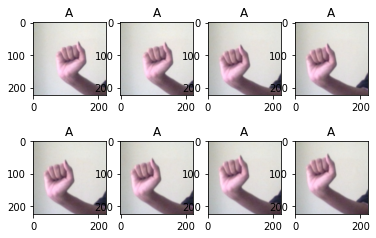

In [55]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i])
    plt.title(labels[i])

In [59]:
blur_img =[]
hsv_img = []
for img in data:
    Gaussain_blur =cv2.GaussianBlur(img,(5,5),0)
    Hsv_img=cv2.cvtColor(Gaussain_blur, cv2.COLOR_BGR2HSV)
    blur_img.append(Gaussain_blur)
    hsv_img.append(Hsv_img)

## Gaussian blur image

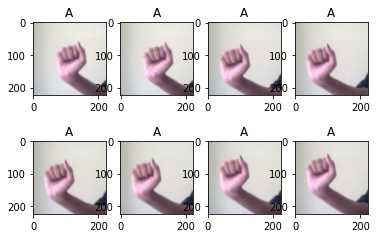

In [57]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blur_img[i])
    plt.title(labels[i])
    
    
    

## HSV IMAGE

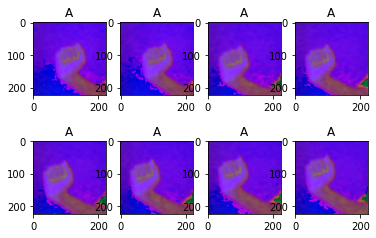

In [60]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(hsv_img[i])
    plt.title(labels[i])

In [23]:
data =np.array(hsv_img)
labels =np.array(labels)


## SPLITTING DATA 

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2,stratify =labels,random_state =42)

## SHAPE OF TRAINING AND TESTING DATA

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 224, 224, 3)
(120,)
(30, 224, 224, 3)
(30,)


## NORMALIZING THE DATA

In [9]:
x_train =x_train/255
x_test = x_test/255

In [10]:
#x_train = x_train.reshape(x_train.shape[0], 224, 224, 3)
#x_test = x_test.reshape(x_test.shape[0], 224, 224, 3)

In [11]:
x_test.shape

(30, 224, 224, 3)

In [12]:
lb = preprocessing.LabelBinarizer()
y_train =lb.fit_transform(y_train)
y_test =lb.fit_transform(y_test)

In [13]:
x_test.shape,y_test.shape

((30, 224, 224, 3), (30, 3))

## CNN MODEL

In [14]:
#CNN
# 1st sequential for forward and backoard propogation
model = models.Sequential()
#adding convolution layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3),padding ='same'))
#max pooling
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Drop_out
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

In [15]:
# now flatten 
model.add(layers.Flatten())
# fully connected neural network
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        3

In [17]:
x_train.shape,y_train.shape

((120, 224, 224, 3), (120, 3))

In [18]:
x_test.shape,y_test.shape

((30, 224, 224, 3), (30, 3))

In [19]:
# compile and train model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 15s 4s/step - loss: 2.6479 - accuracy: 0.1771 - val_loss: 1.0859 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 8s 3s/step - loss: 1.1120 - accuracy: 0.3646 - val_loss: 1.0912 - val_accuracy: 0.4167
Epoch 3/20
3/3 [==============================] - 7s 3s/step - loss: 1.1052 - accuracy: 0.3125 - val_loss: 1.0955 - val_accuracy: 0.4167
Epoch 4/20
3/3 [==============================] - 8s 3s/step - loss: 1.0950 - accuracy: 0.4479 - val_loss: 1.0991 - val_accuracy: 0.2500
Epoch 5/20
3/3 [==============================] - 7s 3s/step - loss: 1.0917 - accuracy: 0.3542 - val_loss: 1.1003 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 8s 3s/step - loss: 1.0919 - accuracy: 0.3542 - val_loss: 1.0822 - val_accuracy: 0.2917
Epoch 7/20
3/3 [==============================] - 7s 3s/step - loss: 1.0618 - accuracy: 0.6979 - val_loss: 1.0560 - val_accuracy: 0.3333
Epoch 8/20
3/3 [========================

## PLOTTING 

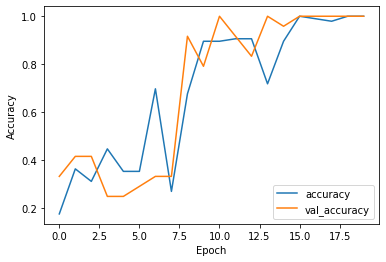

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

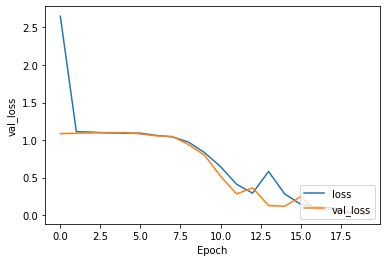

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [22]:
'''# keras tuner
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model'''

"# keras tuner\ndef build_model(hp):  \n  model = keras.Sequential([\n    keras.layers.Conv2D(\n        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),\n        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),\n        activation='relu',\n        input_shape=(224,224,3)\n    ),\n    keras.layers.Conv2D(\n        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),\n        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),\n        activation='relu'\n    ),\n    keras.layers.Flatten(),\n    keras.layers.Dense(\n        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),\n        activation='relu'\n    ),\n    keras.layers.Dense(10, activation='softmax')\n  ])\n  \n  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\n  \n  return model"

In [23]:
'''from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters'''

'from keras_tuner import RandomSearch\nfrom keras_tuner.engine.hyperparameters import HyperParameters'

In [24]:
'''tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="sign_language")'''

'tuner_search=RandomSearch(build_model,\n                          objective=\'val_accuracy\',\n                          max_trials=5,directory=\'output\',project_name="sign_language")'

In [25]:
'''tuner_search.search(x_train,train_label,epochs=3,validation_split=0.1)'''

'tuner_search.search(x_train,train_label,epochs=3,validation_split=0.1)'

In [26]:
x_test.shape

(30, 224, 224, 3)

In [27]:
y_test.shape

(30, 3)

In [28]:
score = model.evaluate(x_test, y_test,batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 1s 638ms/step - loss: 0.0173 - accuracy: 1.0000
Test loss: 0.017271796241402626
Test accuracy: 1.0


In [29]:
y_predict=model.predict(x_test)
print(y_predict)
y_result  =np.argmax(y_predict,axis =1)
print(y_result)
y_test=np.argmax(y_test,axis =1)

1/1 [==============================] - 1s 803ms/step
[[9.93253529e-01 1.43460449e-04 6.60300488e-03]
 [7.80463964e-03 3.23561326e-05 9.92163002e-01]
 [3.81890914e-06 9.99992490e-01 3.64463676e-06]
 [2.50490662e-03 9.97480690e-01 1.44392925e-05]
 [9.64978576e-01 1.15752537e-05 3.50098535e-02]
 [2.22873814e-06 9.99987841e-01 9.87320527e-06]
 [9.93446052e-01 3.01875669e-04 6.25210162e-03]
 [9.95835185e-01 2.16495493e-04 3.94828618e-03]
 [2.67782714e-02 8.34826962e-04 9.72386956e-01]
 [1.36567233e-02 9.84771073e-01 1.57215574e-03]
 [4.73567359e-02 1.19570375e-03 9.51447606e-01]
 [3.16459429e-03 1.92048537e-05 9.96816218e-01]
 [1.02563314e-01 9.70488042e-03 8.87731791e-01]
 [1.34073924e-02 9.84899521e-01 1.69302698e-03]
 [9.73086596e-01 2.82615889e-03 2.40872540e-02]
 [9.54859495e-01 4.08221444e-04 4.47322726e-02]
 [9.98049617e-01 4.83780255e-04 1.46661187e-03]
 [4.46622842e-04 9.99111116e-01 4.42188466e-04]
 [3.14357203e-05 9.99945998e-01 2.25629537e-05]
 [1.61062200e-02 5.17961962e-05 9.8

In [30]:
print(y_result)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


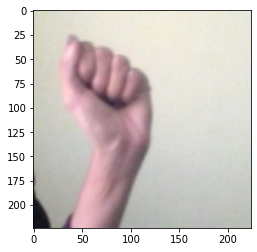

In [31]:
plt.imshow(x_test[0])

## PLOTTING CONFUSION MATRIX

accuracy_score 1.0

confusion_matrix               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



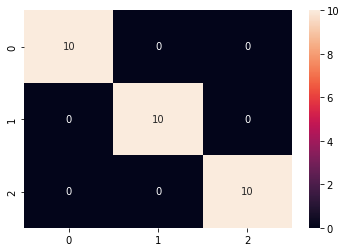

In [32]:
from sklearn.metrics import classification_report as cr,accuracy_score,confusion_matrix
cm =confusion_matrix(y_test,y_result)
sns.heatmap(cm,annot =True)
print("accuracy_score",accuracy_score(y_test,y_result))
print()
print('confusion_matrix',cr(y_test,y_result))

In [33]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0], dtype=int64)

# PREDICTION

In [34]:
path_a=r'C:\Users\dell\Downloads\TEST_DATA\A-samples\14.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[158 172 171]
  [156 170 169]
  [154 168 167]
  ...
  [166 171 172]
  [162 170 170]
  [159 167 167]]

 [[159 171 171]
  [156 170 169]
  [154 166 166]
  ...
  [168 173 174]
  [164 172 172]
  [161 169 169]]

 [[159 169 169]
  [157 169 169]
  [157 167 167]
  ...
  [170 175 176]
  [168 173 174]
  [166 171 172]]

 ...

 [[156 158 158]
  [158 160 160]
  [160 162 162]
  ...
  [154 150 191]
  [154 150 191]
  [154 150 191]]

 [[158 160 160]
  [159 161 161]
  [161 163 163]
  ...
  [155 151 193]
  [153 151 193]
  [153 151 193]]

 [[160 162 162]
  [160 162 162]
  [161 163 163]
  ...
  [155 151 193]
  [153 151 193]
  [153 151 193]]]
[[[0.76       0.76444444 0.70222222]
  [0.75111111 0.75555556 0.69333333]
  [0.74222222 0.74666667 0.68444444]
  ...
  [0.76444444 0.76       0.73777778]
  [0.75555556 0.75555556 0.72      ]
  [0.74222222 0.74222222 0.70666667]]

 [[0.76       0.76       0.70666667]
  [0.75111111 0.75555556 0.69333333]
  [0.73777778 0.73777778 0.68444444]
  ...
  [0.77333333 0.7688888

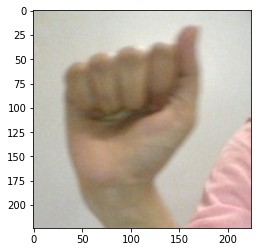

In [35]:
img_1 =cv2.imread(path_a)
print(img_1)
img_2= cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_2=cv2.resize(img_2,(224,224))
img_2 =img_2/225
new_image = tf.expand_dims(img_2,0)
print(img_2)
print(new_image)
plt.imshow(img_2)


In [36]:
pred_img=model.predict(np.array(new_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

1/1 [==============================] - 0s 64ms/step
[[9.9576485e-01 5.5885524e-04 3.6762573e-03]]


array([0], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[174 181 184]
  [172 179 182]
  [170 179 182]
  ...
  [130 177 191]
  [129 176 190]
  [127 176 190]]

 [[172 179 182]
  [172 179 182]
  [170 179 182]
  ...
  [134 179 193]
  [131 178 192]
  [129 178 192]]

 [[172 180 180]
  [171 179 179]
  [169 179 179]
  ...
  [136 180 193]
  [133 178 191]
  [132 180 192]]

 ...

 [[166 166 166]
  [165 165 165]
  [164 164 164]
  ...
  [166 171 174]
  [167 172 175]
  [169 174 177]]

 [[167 167 167]
  [166 166 166]
  [168 166 166]
  ...
  [167 172 175]
  [170 174 179]
  [173 177 182]]

 [[169 169 169]
  [169 169 169]
  [171 169 169]
  ...
  [168 173 176]
  [173 177 182]
  [177 181 186]]]
[[[0.81777778 0.80444444 0.77333333]
  [0.80888889 0.79555556 0.76444444]
  [0.80888889 0.79555556 0.75555556]
  ...
  [0.84888889 0.78666667 0.57777778]
  [0.84444444 0.78222222 0.57333333]
  [0.84444444 0.78222222 0.56444444]]

 [[0.80888889 0.79555556 0.76444444]
  [0.80888889 0.79555556 0.76444444]
  [0.80888889 0.79555556 0.75555556]
  ...
  [0.85777778 0.7955555

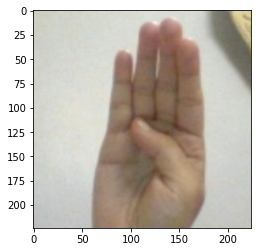

In [37]:
path_b =r'C:\Users\dell\Downloads\TEST_DATA\B -samples\2.jpg'
img_b =cv2.imread(path_b)
print(img_b)
plt.imshow(img_b)
img_B= cv2.cvtColor(img_b,cv2.COLOR_BGR2RGB)
img_B=cv2.resize(img_B,(224,224))
img_B =img_B/225
new_image_b= tf.expand_dims(img_B,0)
print(img_B)
print(new_image)
plt.imshow(img_B)


In [38]:
pred_img=model.predict(np.array(new_image_b))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

1/1 [==============================] - 0s 64ms/step
[[0.51079017 0.4818874  0.0073224 ]]


array([0], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[163 171 171]
  [161 169 169]
  [161 169 169]
  ...
  [110 131 139]
  [ 95 114 122]
  [ 97 116 124]]

 [[163 171 171]
  [162 170 170]
  [162 170 170]
  ...
  [123 144 152]
  [108 127 135]
  [ 92 111 119]]

 [[164 172 172]
  [162 170 170]
  [162 170 170]
  ...
  [132 152 163]
  [119 137 148]
  [ 97 115 126]]

 ...

 [[157 154 156]
  [156 153 155]
  [155 152 154]
  ...
  [ 73  89 105]
  [ 73  89 102]
  [ 74  90 103]]

 [[157 154 156]
  [156 153 155]
  [155 152 154]
  ...
  [ 73  89 105]
  [ 73  89 102]
  [ 73  89 102]]

 [[154 151 153]
  [153 150 152]
  [151 148 150]
  ...
  [ 73  89 105]
  [ 73  89 102]
  [ 73  89 102]]]
[[[0.76       0.76       0.72444444]
  [0.75111111 0.75111111 0.71555556]
  [0.75111111 0.75111111 0.71555556]
  ...
  [0.61777778 0.58222222 0.48888889]
  [0.54222222 0.50666667 0.42222222]
  [0.55111111 0.51555556 0.43111111]]

 [[0.76       0.76       0.72444444]
  [0.75555556 0.75555556 0.72      ]
  [0.75555556 0.75555556 0.72      ]
  ...
  [0.67555556 0.64     

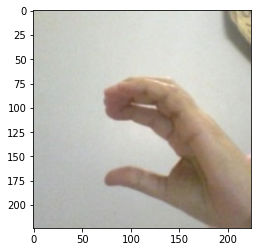

In [39]:
path_c =r'C:\Users\dell\Downloads\TEST_DATA\C-samples\4.jpg'
img_c =cv2.imread(path_c)
print(img_c)
plt.imshow(img_c)
img_C= cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)
img_C=cv2.resize(img_C,(224,224))
img_C =img_C/225
new_image_c= tf.expand_dims(img_C,0)
print(img_C)
print(new_image_c)
plt.imshow(img_C)

In [40]:
pred_img=model.predict(np.array(new_image_c))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

1/1 [==============================] - 0s 64ms/step
[[0.4023906  0.00404659 0.59356284]]


array([2], dtype=int64)